In [11]:
!pip install kaggle


In [12]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ratnadeeppaul","key":"b8d852dadace02d3f948bef8eed39630"}'}

In [13]:
import os

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [14]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals --unzip -p /content/


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals
License(s): other


In [15]:
!kaggle datasets list


ref                                                         title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/student-depression-dataset                      Student Depression Dataset                         467020  2025-03-13 03:12:30.423000          16738        266  1.0              
ricardobj/electric-vehicle-population                       Electric Vehicle Population                       7925319  2025-04-10 10:47:13.150000           1320         25  1.0              
zahidmughal2343/amazon-sales-2025                           Amazon Sales 2025                                    3617  2025-04-03 22:08:13.607000           3197         44  1.0              
adilshamim8/math-students                    

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [17]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [18]:
# Ensuring the GPU is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is being used.


In [19]:
!ls /content/


'animal-image-dataset-90-different-animals-metadata (1).json'
 animal-image-dataset-90-different-animals-metadata.json
 animals
'name of the animals.txt'
 sample_data


In [37]:
!ls /content/animals


animals


In [38]:
dataset_path = "/content/animals/animals"

In [43]:
if os.path.exists(dataset_path):
    classes = os.listdir(dataset_path)
    num_classes = len(classes)
    print(f'Number of Classes: {num_classes}')
    print(f'Classes: {classes}')
else:
    print("Dataset path does not exist. Check the correct location.")


Number of Classes: 90
Classes: ['reindeer', 'lizard', 'wolf', 'boar', 'caterpillar', 'pelecaniformes', 'hippopotamus', 'turkey', 'shark', 'cockroach', 'bat', 'tiger', 'seahorse', 'leopard', 'penguin', 'whale', 'swan', 'deer', 'cat', 'elephant', 'beetle', 'hyena', 'squid', 'crab', 'otter', 'eagle', 'hedgehog', 'lobster', 'hummingbird', 'orangutan', 'horse', 'donkey', 'pig', 'snake', 'hornbill', 'dolphin', 'ox', 'okapi', 'starfish', 'bee', 'dragonfly', 'seal', 'koala', 'cow', 'flamingo', 'oyster', 'porcupine', 'grasshopper', 'moth', 'octopus', 'lion', 'sheep', 'raccoon', 'jellyfish', 'rhinoceros', 'turtle', 'possum', 'owl', 'sandpiper', 'panda', 'mosquito', 'squirrel', 'rat', 'crow', 'chimpanzee', 'fox', 'butterfly', 'woodpecker', 'hamster', 'ladybugs', 'fly', 'goat', 'parrot', 'hare', 'wombat', 'pigeon', 'duck', 'gorilla', 'mouse', 'bear', 'zebra', 'coyote', 'kangaroo', 'dog', 'goldfish', 'sparrow', 'goose', 'antelope', 'bison', 'badger']


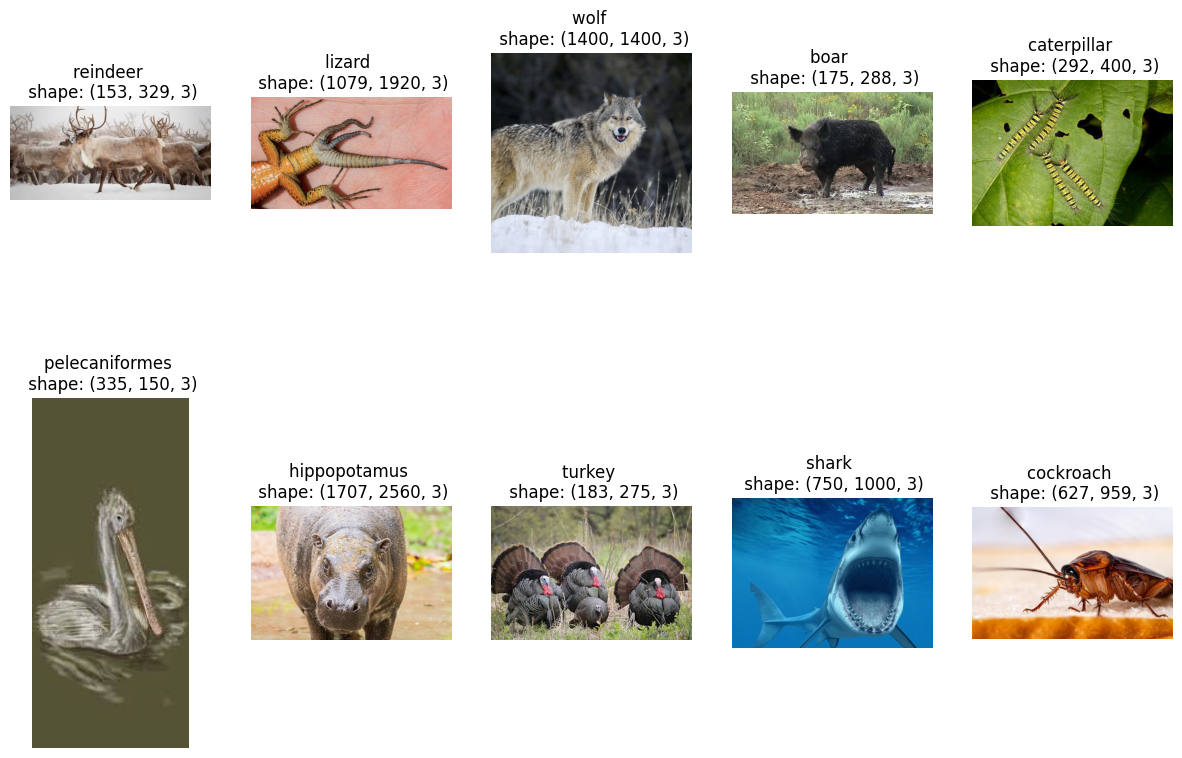

In [22]:
plt.figure(figsize=(15,10))

for i, class_name in enumerate(os.listdir(dataset_path)[:10]):
    class_path = os.path.join(dataset_path, class_name)


    img_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('png', 'jpg', 'jpeg'))]

    if not img_files:
        print(f"⚠️ No images found in {class_name}")
        continue

    img_path = os.path.join(class_path, img_files[0])
    img = plt.imread(img_path)

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f'{class_name} \n shape: {img.shape}')
    plt.axis('off')

plt.show()


In [24]:
# Preprocessing the data.
# Define image size and batch_size - Trained model - MobileNetV2 - 224 x 224
img_size = (224,224)
batch_size = 64 # There can be 64 images in a batch

# Data Augmentation and preprocessing
datagen = ImageDataGenerator(
  rescale=1./255,
  validation_split=0.1
)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [25]:
# Map the classes - class_indices
class_indices = train_generator.class_indices
print(class_indices)
# Extract class names
class_names = list(class_indices.keys())
print("Class Names: ", class_names)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [26]:
# Load MobileNetV2 as the base model
base_model = MobileNetV2(
    weights ='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze the base model, training
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x) # output layer

# create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
# Model summary
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,661,978 (13.97 MB)

 Trainable params: 1,403,994 (5.36 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [27]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs = 20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 585ms/step - accuracy: 0.0639 - loss: 4.4070 - val_accuracy: 0.5137 - val_loss: 3.1299
Epoch 2/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.2031 - loss: 3.4738

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.2031 - loss: 3.4738 - val_accuracy: 0.5312 - val_loss: 3.1010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 60s 451ms/step - accuracy: 0.4495 - loss: 2.8452 - val_accuracy: 0.7168 - val_loss: 1.7727
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7031 - loss: 1.5885 - val_accuracy: 0.7148 - val_loss: 1.7738
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 510ms/step - accuracy: 0.6594 - loss: 1.6959 - val_accuracy: 0.7852 - val_loss: 1.1560
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7188 - loss: 1.2847 - val_accuracy: 0.7832 - val_loss: 1.1563
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 444ms/step - accuracy: 0.7397 - loss: 1.1281 - val_accuracy: 0.8203 - val_loss: 0.9136
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7031 - loss: 1.1414 - val_accuracy: 0.8145 - val_loss: 0.9124
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.7902 - loss: 0.8664 - val_accuracy: 0.8223 - val_

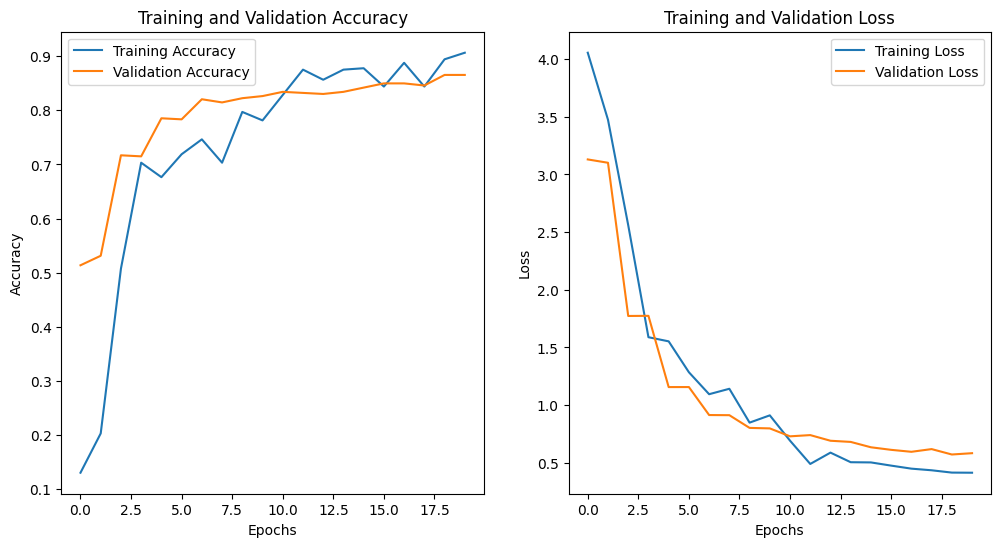

In [28]:
# Evaluate the model - plotting the training and validation acc/loss
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 824ms/step - accuracy: 0.8633 - loss: 0.5383
Validation Loss: 0.5863887071609497
Validation Accuracy: 0.8611111044883728


In [30]:
# save the model
model.save('MCAR.keras')

In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('MCAR.keras')

def predict_animal(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_array /= 255.0
  img_array = np.expand_dims(img_array, axis=0)

  prediction = model.predict(img_array)
  predicted_class = class_names[np.argmax(prediction)]

  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class}")
  plt.axis('off')
  plt.show()

  print("\n" + f"✅ Predicted Animal: {predicted_class}")

In [56]:
os.listdir('/content/animals/animals/parrot')

['8cdc657d99.jpg',
 '7b8d54f49e.jpg',
 '87bc6bdcd7.jpg',
 '47ef39ceb6.jpg',
 '8a8a69d934.jpg',
 '1dd93e1004.jpg',
 '1f4f736dbf.jpg',
 '5b1030ddd5.jpg',
 '0b2a1e349a.jpg',
 '6a0ab0de34.jpg',
 '96c5e35a54.jpg',
 '60e0c50a4a.jpg',
 '0b29c10342.jpg',
 '29c26708a0.jpg',
 '080a286cf3.jpg',
 '3a0c5d4582.jpg',
 '47d00fc79f.jpg',
 '34f9668c8e.jpg',
 '89d679b9e5.jpg',
 '4aba5914cd.jpg',
 '0d778c6833.jpg',
 '1b9f359f9c.jpg',
 '060cca8826.jpg',
 '50e40b5356.jpg',
 '91f0604cc7.jpg',
 '1cabf8a760.jpg',
 '5d18e7e995.jpg',
 '4faf55514e.jpg',
 '3f5e9e225b.jpg',
 '3ac69be3f6.jpg',
 '7d5cb5f5fa.jpg',
 '036b760476.jpg',
 '0100ec7408.jpg',
 '6be2eb3fb3.jpg',
 '7dab3a1142.jpg',
 '46c1b71d00.jpg',
 '4c26cd72e2.jpg',
 '62fc818264.jpg',
 '27a9ce4e1a.jpg',
 '64bd254fef.jpg',
 '66e79b1a2f.jpg',
 '0f072e6ce1.jpg',
 '6a184a05f3.jpg',
 '4ead913624.jpg',
 '3de507dbb6.jpg',
 '9c2dd51734.jpg',
 '84b6622dbc.jpg',
 '1bcd666a4e.jpg',
 '8f5a2730b3.jpg',
 '2f207b75e3.jpg',
 '56b19e9dbc.jpg',
 '46ed4828b1.jpg',
 '4af25ae32d

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


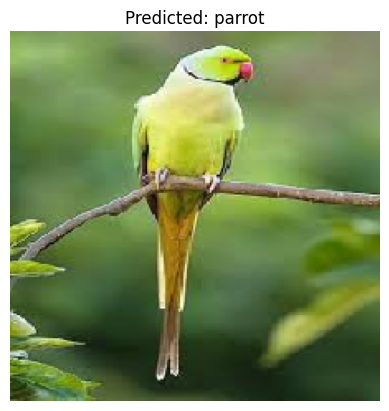


✅ Predicted Animal: parrot


In [57]:
predict_animal('/content/animals/animals/parrot/60e0c50a4a.jpg')